# Using Only ReLU to Perfectly Classify the Given Data

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define the data given (x1, x2, d)
x1 = np.array([1, 0, -1, 0, 0.5, -0.5, 0.5, -0.5])
x2 = np.array([0, 1, 0, -1, 0.5, 0.5, -0.5, -0.5])
d = np.array([1, 1, 1, 1, 0, 0, 0, 0])

# Defining hyperparameters
learning_rate = 0.01
epochs = 100
hidden_size = 15
batch_size = 8
weight_decay = 0.001

# Initialize weights and biases
np.random.seed(0)
input_size = 2
output_size = 1

weights_input_hidden = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
bias_output = np.zeros((1, output_size))

In [3]:
# ReLU Activation Function
def relu(x):
    return np.maximum(0, x)

# ReLU Derivative for back propagation
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

In [4]:
# Main training loop
for epoch in range(epochs):
    # Shuffling the data --> batch training
    indices = np.arange(len(x1))
    np.random.shuffle(indices)
    x1_shuffled = x1[indices]
    x2_shuffled = x2[indices]
    d_shuffled = d[indices]

    # Mini-batch training
    for batch_start in range(0, len(x1), batch_size):
        batch_end = batch_start + batch_size
        x1_batch = x1_shuffled[batch_start:batch_end]
        x2_batch = x2_shuffled[batch_start:batch_end]
        d_batch = d_shuffled[batch_start:batch_end]

        # Forward pass
        input_layer = np.column_stack((x1_batch, x2_batch))
        hidden_layer_input = np.dot(input_layer, weights_input_hidden) + bias_hidden
        hidden_layer_output = relu(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
        predicted_output = relu(output_layer_input)  # Binary classification
        # print(f"Predicted Output: {predicted_output}")

        # Cross-entropy loss
        error = -d_batch.reshape(-1, 1) * np.log(predicted_output) - (1 - d_batch.reshape(-1, 1)) * np.log(1 - predicted_output)
        loss = np.mean(error)
        # print(f"Error: {error}, Loss: {loss}")

        # L2 regularization
        l2_regularization = 0.5 * weight_decay * (np.sum(weights_input_hidden ** 2) + np.sum(weights_hidden_output ** 2))

        # Total loss with regularization
        total_loss = loss + l2_regularization
        # print(f"Loss after L2-Regularization: {total_loss}")

        # Backpropagation
        delta_output = predicted_output - d_batch.reshape(-1, 1)
        delta_hidden = delta_output.dot(weights_hidden_output.T) * relu_derivative(hidden_layer_output)

        # Update weights and biases
        weights_hidden_output -= hidden_layer_output.T.dot(delta_output) * learning_rate + weight_decay * weights_hidden_output
        bias_output -= np.sum(delta_output, axis=0, keepdims=True) * learning_rate
        weights_input_hidden -= input_layer.T.dot(delta_hidden) * learning_rate + weight_decay * weights_input_hidden
        bias_hidden -= np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

    # Logging the loss
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

Epoch 100/100, Loss: 0.4974


In [5]:
# Testing the trained network
test_data = np.column_stack((x1, x2))
test_hidden_input = np.dot(test_data, weights_input_hidden) + bias_hidden
test_hidden_output = relu(test_hidden_input)
test_output_input = np.dot(test_hidden_output, weights_hidden_output) + bias_output
test_predicted_output = relu(test_output_input)  # Binary classification

# Implementing a threshold of 0.5 (binary classification)
prediction = (test_predicted_output >= 0.5).astype(int).flatten()
print("Expected Outputs:", d)
print("Predicted Outputs:", prediction)

Expected Outputs: [1 1 1 1 0 0 0 0]
Predicted Outputs: [1 1 1 1 0 0 0 0]


# Comparing Activation Functions (ReLU, Sigmoid, Tanh)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Define the data given (x1, x2, d)
x1 = np.array([1, 0, -1, 0, 0.5, -0.5, 0.5, -0.5])
x2 = np.array([0, 1, 0, -1, 0.5, 0.5, -0.5, -0.5])
d = np.array([1, 1, 1, 1, 0, 0, 0, 0])

In [8]:
# Activation functions to compare
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

In [9]:
# Define a function to create and train a neural network
def train_network(activation_function):
    # Define hyperparameters
    input_size = 2
    hidden_size = 32
    output_size = 1
    learning_rate = 0.01
    epochs = 1000
    weight_decay = 0.001
    batch_size = 8

    # Initialize weights and biases
    np.random.seed(0)
    weights_input_hidden = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
    bias_hidden = np.zeros((1, hidden_size))
    weights_hidden_output = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
    bias_output = np.zeros((1, output_size))

    # Activation function
    if activation_function == 'ReLU':
        activation_fn = lambda x: np.maximum(0, x)
        derivative = lambda x: np.where(x > 0, 1, 0)
    elif activation_function == 'Sigmoid':
        activation_fn = lambda x: 1 / (1 + np.exp(-x))
        derivative = lambda x: sigmoid(x) * (1 - sigmoid(x))
    elif activation_function == 'Tanh':
        activation_fn = lambda x: np.tanh(x)
        derivative = lambda x: 1 - np.tanh(x)**2
    else:
        raise ValueError("Invalid activation function")

    loss_history = []

    # Main training loop
    for epoch in range(epochs):
    # Shuffling the data --> batch training
        indices = np.arange(len(x1))
        np.random.shuffle(indices)
        x1_shuffled = x1[indices]
        x2_shuffled = x2[indices]
        d_shuffled = d[indices]

        # Mini-batch training
        for batch_start in range(0, len(x1), batch_size):
            batch_end = batch_start + batch_size
            x1_batch = x1_shuffled[batch_start:batch_end]
            x2_batch = x2_shuffled[batch_start:batch_end]
            d_batch = d_shuffled[batch_start:batch_end]

        # for epoch in range(epochs):
            # Forward pass
            hidden_input = np.dot(np.column_stack((x1, x2)), weights_input_hidden) + bias_hidden
            hidden_output = activation_fn(hidden_input)
            output = np.dot(hidden_output, weights_hidden_output) + bias_output
            predicted_output = activation_fn(output)

            # Calculate loss (cross-entropy)
            error = -d.reshape(-1, 1) * np.log(predicted_output) - (1 - d.reshape(-1, 1)) * np.log(1 - predicted_output)
            loss = np.mean(error)

            l2_regularization = 0.5 * weight_decay * (np.sum(weights_input_hidden ** 2) + np.sum(weights_hidden_output ** 2))

            # Total loss with regularization
            total_loss = loss + l2_regularization
            loss_history.append(total_loss)

            # Backpropagation
            delta_output = predicted_output - d.reshape(-1, 1)
            delta_hidden = delta_output.dot(weights_hidden_output.T) * derivative(hidden_output)

            # Update weights and biases
            weights_hidden_output -= hidden_output.T.dot(delta_output) * learning_rate
            bias_output -= np.sum(delta_output, axis=0, keepdims=True) * learning_rate
            weights_input_hidden -= np.column_stack((x1, x2)).T.dot(delta_hidden) * learning_rate
            bias_hidden -= np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

        # Calculate final accuracy
        predictions = (predicted_output >= 0.5).astype(int).flatten()
        accuracy = accuracy_score(d, predictions)

        # Log performance metrics
        performance_metrics = {
            'loss_history': loss_history,
            'epochs': range(epochs),
            'accuracy': accuracy
        }

    return (weights_input_hidden, bias_hidden, weights_hidden_output, bias_output), performance_metrics

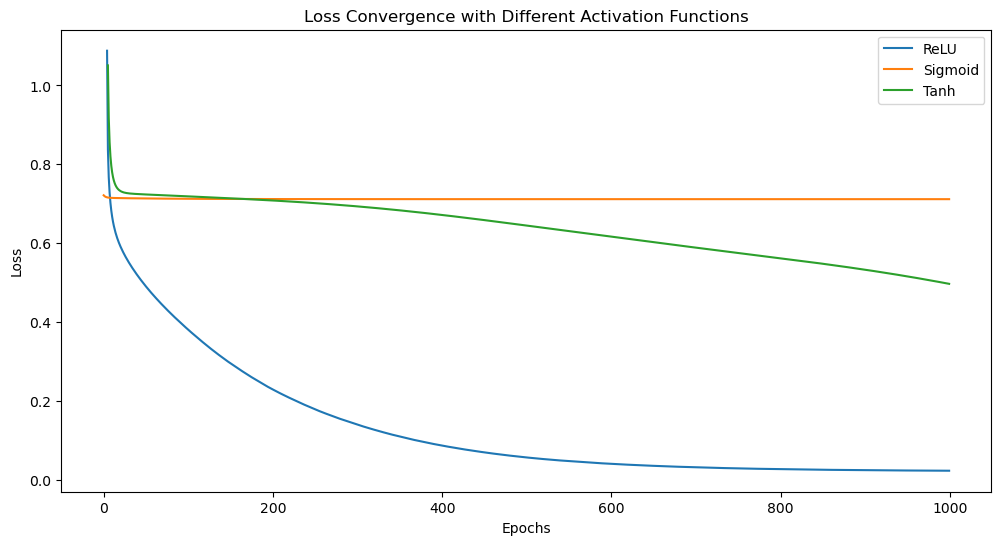

Activation Function: ReLU
Final Accuracy: 1.0000

Activation Function: Sigmoid
Final Accuracy: 0.5000

Activation Function: Tanh
Final Accuracy: 0.7500



In [10]:
# Try different activation functions
activation_functions = ['ReLU', 'Sigmoid', 'Tanh']
results = []

for activation_function in activation_functions:
    trained_network, performance_metrics = train_network(activation_function)
    results.append((activation_function, trained_network, performance_metrics))

# display(performance_metrics)
# display(performance_metrics['accuracy'])

# Visualize the results
plt.figure(figsize=(12, 6))

for activation_function, _, performance_metrics in results:
    plt.plot(performance_metrics['epochs'], performance_metrics['loss_history'], label=activation_function)

plt.title('Loss Convergence with Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.grid(True)
plt.show()

for activation_function, _, performance_metrics in results:
    print(f"Activation Function: {activation_function}")
    print(f"Final Accuracy: {performance_metrics['accuracy']:.4f}\n")

# Comparing Activation Functions with Hidden Layer Size 32

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Define the data given (x1, x2, d)
x1 = np.array([1, 0, -1, 0, 0.5, -0.5, 0.5, -0.5])
x2 = np.array([0, 1, 0, -1, 0.5, 0.5, -0.5, -0.5])
d = np.array([1, 1, 1, 1, 0, 0, 0, 0])

In [13]:
# Define activation functions and their derivatives
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

# Parametric ReLU
def prelu(x, alpha):
    return np.where(x > 0, x, alpha * x)

def prelu_derivative(x, alpha):
    return np.where(x > 0, 1, alpha)

# Exponential Linear Unit
def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def elu_derivative(x, alpha=1.0):
    return np.where(x > 0, 1, alpha * np.exp(x))

# Scaled Exponential Linear Unit
def selu(x, alpha=1.67326, scale=1.0507):
    return scale * np.where(x > 0, x, alpha * (np.exp(x) - 1))

def selu_derivative(x, alpha=1.67326, lambda_=1.0507):
    return np.where(x > 0, lambda_ * alpha, lambda_ * alpha * np.exp(x))

def swish(x, beta=1.0):
    return x * sigmoid(beta * x)

def swish_derivative(x):
    sigmoid_x = 1 / (1 + np.exp(-x))
    return x * sigmoid_x + (1 - sigmoid_x) * (x + swish(x))

In [14]:
# Define a function to create and train a neural network
def train_network(activation_function):
    # Define hyperparameters
    input_size = 2
    hidden_size = 32
    output_size = 1
    learning_rate = 0.01
    epochs = 1000
    weight_decay = 0.001
    batch_size = 8

    # Initialize weights and biases
    np.random.seed(0)
    weights_input_hidden = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
    bias_hidden = np.zeros((1, hidden_size))
    weights_hidden_output = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
    bias_output = np.zeros((1, output_size))

    if activation_function == 'ReLU':
        activation_fn = relu
        derivative = relu_derivative
    elif activation_function == 'Sigmoid':
        activation_fn = sigmoid
        derivative = sigmoid_derivative
    elif activation_function == 'Tanh':
        activation_fn = tanh
        derivative = tanh_derivative
    elif activation_function == 'Leaky ReLU':
        activation_fn = lambda x: leaky_relu(x, alpha=0.01)
        derivative = lambda x: leaky_relu_derivative(x, alpha=0.01)
    elif activation_function == 'PreLU':
        alpha = np.random.rand(1)  # Initialize alpha as a random parameter
        activation_fn = lambda x: prelu(x, alpha)
        derivative = lambda x: prelu_derivative(x, alpha)
    elif activation_function == 'eLU':
        activation_fn = lambda x: elu(x, alpha=1.0)
        derivative = lambda x: elu_derivative(x, alpha=1.0)
    elif activation_function == 'SeLU':
        activation_fn = lambda x: selu(x, alpha=1.67326, scale=1.0507)
        derivative = lambda x: selu_derivative(x, alpha=1.67326, lambda_=1.0507)
    elif activation_function == 'Swish':
        activation_fn = lambda x: swish(x, beta=1.0)
        derivative = lambda x: swish_derivative(x)
    else:
        raise ValueError("Invalid activation function")
        
    loss_history = []

    # Main training loop
    for epoch in range(epochs):
    # Shuffling the data --> batch training
        indices = np.arange(len(x1))
        np.random.shuffle(indices)
        x1_shuffled = x1[indices]
        x2_shuffled = x2[indices]
        d_shuffled = d[indices]

        # Mini-batch training
        for batch_start in range(0, len(x1), batch_size):
            batch_end = batch_start + batch_size
            x1_batch = x1_shuffled[batch_start:batch_end]
            x2_batch = x2_shuffled[batch_start:batch_end]
            d_batch = d_shuffled[batch_start:batch_end]
    
    # for epoch in range(epochs):
        # Forward pass
            hidden_input = np.dot(np.column_stack((x1, x2)), weights_input_hidden) + bias_hidden
            hidden_output = activation_fn(hidden_input)
            output = np.dot(hidden_output, weights_hidden_output) + bias_output
            predicted_output = activation_fn(output)

            # Calculate loss (cross-entropy)
            error = -d.reshape(-1, 1) * np.log(predicted_output) - (1 - d.reshape(-1, 1)) * np.log(1 - predicted_output)
            loss = np.mean(error)

            l2_regularization = 0.5 * weight_decay * (np.sum(weights_input_hidden ** 2) + np.sum(weights_hidden_output ** 2))

            # Total loss with regularization
            total_loss = loss + l2_regularization
            loss_history.append(total_loss)

            # Backpropagation
            delta_output = predicted_output - d.reshape(-1, 1)
            delta_hidden = delta_output.dot(weights_hidden_output.T) * derivative(hidden_output)

            # Update weights and biases
            weights_hidden_output -= hidden_output.T.dot(delta_output) * learning_rate
            bias_output -= np.sum(delta_output, axis=0, keepdims=True) * learning_rate
            weights_input_hidden -= np.column_stack((x1, x2)).T.dot(delta_hidden) * learning_rate
            bias_hidden -= np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

        # Calculate final accuracy
        predictions = (predicted_output >= 0.5).astype(int).flatten()
        accuracy = accuracy_score(d, predictions)

        # Log performance metrics
        performance_metrics = {
            'loss_history': loss_history,
            'epochs': range(epochs),
            'accuracy': accuracy
        }

    return (weights_input_hidden, bias_hidden, weights_hidden_output, bias_output), performance_metrics

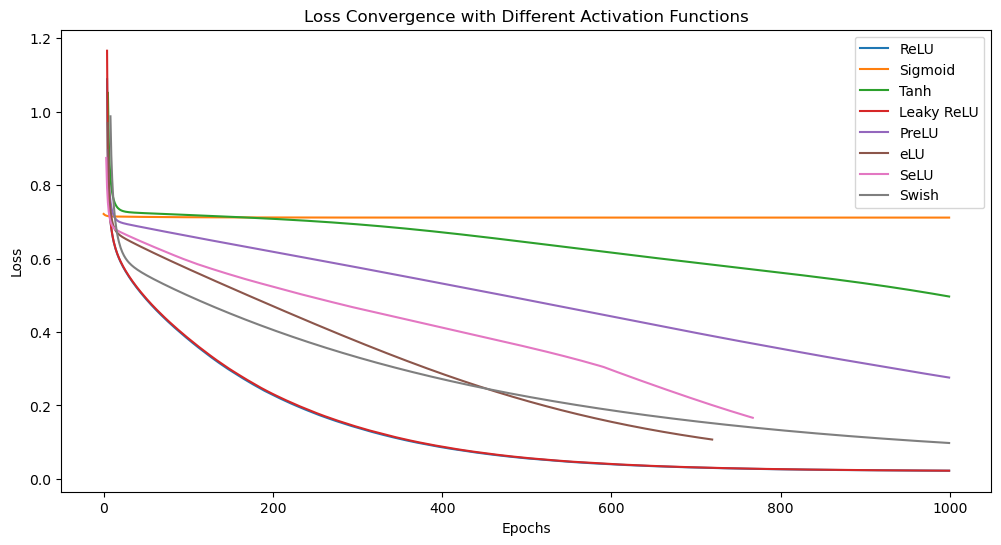

Activation Function: ReLU
Final Accuracy: 1.0000

Activation Function: Sigmoid
Final Accuracy: 0.5000

Activation Function: Tanh
Final Accuracy: 0.7500

Activation Function: Leaky ReLU
Final Accuracy: 1.0000

Activation Function: PreLU
Final Accuracy: 1.0000

Activation Function: eLU
Final Accuracy: 1.0000

Activation Function: SeLU
Final Accuracy: 1.0000

Activation Function: Swish
Final Accuracy: 1.0000



In [15]:
# Try different activation functions
activation_functions = ['ReLU', 'Sigmoid', 'Tanh', 'Leaky ReLU', 'PreLU', 'eLU', 'SeLU', 'Swish']
results = []

for activation_function in activation_functions:
    trained_network, performance_metrics = train_network(activation_function)
    results.append((activation_function, trained_network, performance_metrics))

# display(results)

# Visualize the results
plt.figure(figsize=(12, 6))

for activation_function, _, performance_metrics in results:
    plt.plot(performance_metrics['epochs'], performance_metrics['loss_history'], label=activation_function)

plt.title('Loss Convergence with Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

for activation_function, _, performance_metrics in results:
    print(f"Activation Function: {activation_function}")
    print(f"Final Accuracy: {performance_metrics['accuracy']:.4f}\n")

# Comparing Activation Functions with Hidden Layer Size 15

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Define the data given (x1, x2, d)
x1 = np.array([1, 0, -1, 0, 0.5, -0.5, 0.5, -0.5])
x2 = np.array([0, 1, 0, -1, 0.5, 0.5, -0.5, -0.5])
d = np.array([1, 1, 1, 1, 0, 0, 0, 0])

In [18]:
# Define activation functions and their derivatives
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Parametric ReLU
def prelu(x, alpha):
    return np.where(x > 0, x, alpha * x)

# Exponential Linear Unit
def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

# Scaled Exponential Linear Unit
def selu(x, alpha=1.67326, scale=1.0507):
    return scale * np.where(x > 0, x, alpha * (np.exp(x) - 1))

def swish(x, beta=1.0):
    return x * sigmoid(beta * x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def prelu_derivative(x, alpha):
    return np.where(x > 0, 1, alpha)

def elu_derivative(x, alpha=1.0):
    return np.where(x > 0, 1, alpha * np.exp(x))

def selu_derivative(x, alpha=1.67326, lambda_=1.0507):
    return np.where(x > 0, lambda_ * alpha, lambda_ * alpha * np.exp(x))

def swish_derivative(x):
    sigmoid_x = 1 / (1 + np.exp(-x))
    return x * sigmoid_x + (1 - sigmoid_x) * (x + swish(x))

In [19]:
# Define a function to create and train a neural network
def train_network(activation_function):
    # Define hyperparameters
    input_size = 2
    output_size = 1
    learning_rate = 0.01
    epochs = 1000
    hidden_size = 15
    batch_size = 8
    weight_decay = 0.001
    batch_size = 8

    # Initialize weights and biases
    np.random.seed(0)
    weights_input_hidden = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
    bias_hidden = np.zeros((1, hidden_size))
    weights_hidden_output = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
    bias_output = np.zeros((1, output_size))

    if activation_function == 'ReLU':
        activation_fn = relu
        derivative = relu_derivative
    elif activation_function == 'Sigmoid':
        activation_fn = sigmoid
        derivative = sigmoid_derivative
    elif activation_function == 'Tanh':
        activation_fn = tanh
        derivative = tanh_derivative
    elif activation_function == 'Leaky ReLU':
        activation_fn = lambda x: leaky_relu(x, alpha=0.01)
        derivative = lambda x: leaky_relu_derivative(x, alpha=0.01)
    elif activation_function == 'PreLU':
        alpha = np.random.rand(1)  # Initialize alpha as a random parameter
        activation_fn = lambda x: prelu(x, alpha)
        derivative = lambda x: prelu_derivative(x, alpha)
    elif activation_function == 'eLU':
        activation_fn = lambda x: elu(x, alpha=1.0)
        derivative = lambda x: elu_derivative(x, alpha=1.0)
    elif activation_function == 'SeLU':
        activation_fn = lambda x: selu(x, alpha=1.67326, scale=1.0507)
        derivative = lambda x: selu_derivative(x, alpha=1.67326, lambda_=1.0507)
    elif activation_function == 'Swish':
        activation_fn = lambda x: swish(x, beta=1.0)
        derivative = lambda x: swish_derivative(x)
    else:
        raise ValueError("Invalid activation function")
    
    # # Activation function
    # if activation_function == 'ReLU':
    #     activation_fn = relu
    # elif activation_function == 'Sigmoid':
    #     activation_fn = sigmoid
    # elif activation_function == 'Tanh':
    #     activation_fn = tanh
    # elif activation_function == 'Leaky ReLU':
    #     activation_fn = lambda x: leaky_relu(x, alpha=0.01)
    # elif activation_function == 'PreLU':
    #     alpha = np.random.rand(1)  # Initialize alpha as a random parameter
    #     activation_fn = lambda x: prelu(x, alpha)
    # elif activation_function == 'eLU':
    #     activation_fn = lambda x: elu(x, alpha=1.0)
    # elif activation_function == 'SeLU':
    #     activation_fn = lambda x: selu(x, alpha=1.67326, scale=1.0507)
    # elif activation_function == 'Swish':
    #     activation_fn = lambda x: swish(x, beta=1.0)
    # else:
    #     raise ValueError("Invalid activation function")
        
    loss_history = []

    # Main training loop
    for epoch in range(epochs):
    # Shuffling the data --> batch training
        indices = np.arange(len(x1))
        np.random.shuffle(indices)
        x1_shuffled = x1[indices]
        x2_shuffled = x2[indices]
        d_shuffled = d[indices]

        # Mini-batch training
        for batch_start in range(0, len(x1), batch_size):
            batch_end = batch_start + batch_size
            x1_batch = x1_shuffled[batch_start:batch_end]
            x2_batch = x2_shuffled[batch_start:batch_end]
            d_batch = d_shuffled[batch_start:batch_end]
    
    # for epoch in range(epochs):
        # Forward pass
            hidden_input = np.dot(np.column_stack((x1, x2)), weights_input_hidden) + bias_hidden
            hidden_output = activation_fn(hidden_input)
            output = np.dot(hidden_output, weights_hidden_output) + bias_output
            predicted_output = activation_fn(output)

            # Calculate loss (cross-entropy)
            error = -d.reshape(-1, 1) * np.log(predicted_output) - (1 - d.reshape(-1, 1)) * np.log(1 - predicted_output)
            loss = np.mean(error)

            l2_regularization = 0.5 * weight_decay * (np.sum(weights_input_hidden ** 2) + np.sum(weights_hidden_output ** 2))

            # Total loss with regularization
            total_loss = loss + l2_regularization
            loss_history.append(total_loss)

            # Backpropagation
            delta_output = predicted_output - d.reshape(-1, 1)
            delta_hidden = delta_output.dot(weights_hidden_output.T) * derivative(hidden_output)

            # Update weights and biases
            weights_hidden_output -= hidden_output.T.dot(delta_output) * learning_rate
            bias_output -= np.sum(delta_output, axis=0, keepdims=True) * learning_rate
            weights_input_hidden -= np.column_stack((x1, x2)).T.dot(delta_hidden) * learning_rate
            bias_hidden -= np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

        # Calculate final accuracy
        predictions = (predicted_output >= 0.5).astype(int).flatten()
        accuracy = accuracy_score(d, predictions)

        # Log performance metrics
        performance_metrics = {
            'loss_history': loss_history,
            'epochs': range(epochs),
            'accuracy': accuracy
        }

    return (weights_input_hidden, bias_hidden, weights_hidden_output, bias_output), performance_metrics

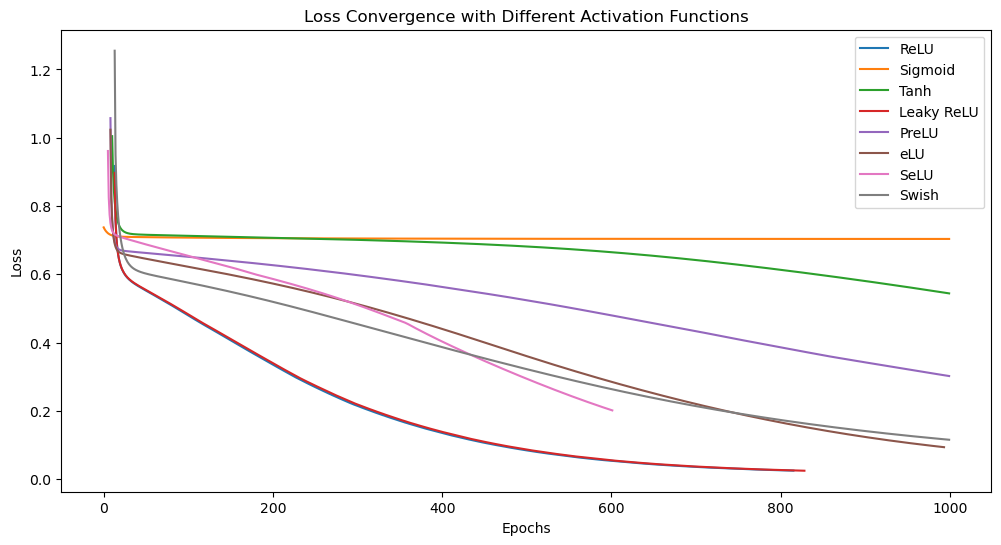

Activation Function: ReLU
Final Accuracy: 1.0000

Activation Function: Sigmoid
Final Accuracy: 0.5000

Activation Function: Tanh
Final Accuracy: 0.8750

Activation Function: Leaky ReLU
Final Accuracy: 1.0000

Activation Function: PreLU
Final Accuracy: 1.0000

Activation Function: eLU
Final Accuracy: 1.0000

Activation Function: SeLU
Final Accuracy: 1.0000

Activation Function: Swish
Final Accuracy: 1.0000



In [20]:
# Try different activation functions
activation_functions = ['ReLU', 'Sigmoid', 'Tanh', 'Leaky ReLU', 'PreLU', 'eLU', 'SeLU', 'Swish']
results = []

for activation_function in activation_functions:
    trained_network, performance_metrics = train_network(activation_function)
    results.append((activation_function, trained_network, performance_metrics))

# display(results)

# Visualize the results
plt.figure(figsize=(12, 6))

for activation_function, _, performance_metrics in results:
    plt.plot(performance_metrics['epochs'], performance_metrics['loss_history'], label=activation_function)

plt.title('Loss Convergence with Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

for activation_function, _, performance_metrics in results:
    print(f"Activation Function: {activation_function}")
    print(f"Final Accuracy: {performance_metrics['accuracy']:.4f}\n")